In [2]:
import os
import copy
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm
from torch import optim
from utils import *
from modules import UNet_conditional, EMA
import logging
from torch.utils.tensorboard import SummaryWriter

import random

In [4]:
random.seed(7)
L = list(range(6))
random.shuffle(L)
draws_left = 60000
for i in range(6):
    print(L[i])
    data_dict = np.load(f'../cifar5m_data/cifar5m_part{L[i]}.npz', allow_pickle=True)
    if i != 5:
        ziehung = random.randint(0, draws_left)
        print('ziehung', ziehung)
    else:
        ziehung = draws_left
    von = random.randint(0, 1000448-60000)
    print('von', von)
    draws_left -= ziehung
    if i == 0:
        x = data_dict["X"][von:von+ziehung]
        y = data_dict["Y"][von:von+ziehung]
    else:
        x = np.concatenate((x, data_dict["X"][von:von+ziehung]))
        y = np.concatenate((y, data_dict["Y"][von:von+ziehung]))
    del data_dict

4
ziehung 4747
von 861168
0
ziehung 35119
von 98702
5
ziehung 11982
von 611097
3
ziehung 475
von 532084
1
ziehung 1758
von 39317
2
von 90122


In [15]:
counter = dict()
for i in y:
    if i in counter:
        counter[i] += 1
    else:
        counter[i] = 1
counter

{2: 5522,
 0: 5270,
 8: 6564,
 4: 5636,
 5: 5415,
 3: 5780,
 6: 6248,
 7: 6481,
 9: 5965,
 1: 7119}

In [5]:
for i in range(len(x)):
    if i % 6000 == 0:
        print(i)
    im = Image.fromarray(x[i])
    im.save(f"../cifar5m_jpg_data_with_classes/{y[i]}/{i}.png", "PNG")
del x, y

0
6000
12000
18000
24000
30000
36000
42000
48000
54000


In [19]:
for i in range(10):
    path = f"../cifar5m_jpg_data_with_classes/{i}"
    object_list = os.listdir(path)
    object_count = len(object_list)

    print(f"Anzahl der Objekte im Ordner {i}:", object_count)

Anzahl der Objekte im Ordner 0: 5270
Anzahl der Objekte im Ordner 1: 7119
Anzahl der Objekte im Ordner 2: 5522
Anzahl der Objekte im Ordner 3: 5780
Anzahl der Objekte im Ordner 4: 5636
Anzahl der Objekte im Ordner 5: 5415
Anzahl der Objekte im Ordner 6: 6248
Anzahl der Objekte im Ordner 7: 6481
Anzahl der Objekte im Ordner 8: 6564
Anzahl der Objekte im Ordner 9: 5965


In [3]:
def get_free_gpu_idx():
    maximum = 0
    id_graka = None
    for i in range(4):
        print(f"GPU {i} hat {torch.cuda.mem_get_info(device=i)[0]/(1024**2)}MB frei von {torch.cuda.mem_get_info(device=i)[1]/(1024**2)}MB")
        if maximum < torch.cuda.mem_get_info(device=i)[0]:
            maximum = torch.cuda.mem_get_info(device=i)[0]
            id_graka = i
    return id_graka

gpu_idx = get_free_gpu_idx()
num_workers = 2
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_idx)
if torch.cuda.current_device() != gpu_idx:
    print('os.environ["CUDA_VISIBLE_DEVICES"] hat nicht geklappt')
    torch.cuda.set_device(gpu_idx)

print("done")

GPU 0 hat 916.4375MB frei von 16125.4375MB
GPU 1 hat 916.4375MB frei von 16125.4375MB
GPU 2 hat 15989.4375MB frei von 16125.4375MB
GPU 3 hat 15989.4375MB frei von 16125.4375MB
os.environ["CUDA_VISIBLE_DEVICES"] hat nicht geklappt
done


In [4]:
device = torch.cuda.current_device()
print("PyTorch verwendet GPU:", device)

PyTorch verwendet GPU: 1


In [1]:
import ddpm_conditional

In [2]:
# im Bildordner den Befehl ausführen, wenn dataloader wieder fehler macht
# rmdir .ipynb_checkpoints

#unter verändert findet man die geänderten sachen

#50 epochen brauchen ca. 3:35h

In [ ]:
ddpm_conditional.laufen()

GPU 0 hat 858.4375MB frei von 16125.4375MB
GPU 1 hat 15989.4375MB frei von 16125.4375MB
GPU 2 hat 15989.4375MB frei von 16125.4375MB
GPU 3 hat 15989.4375MB frei von 16125.4375MB
os.environ["CUDA_VISIBLE_DEVICES"] hat nicht geklappt
done
PyTorch verwendet GPU: 1
load UNet Model from epoch 690
load optimizer from epoch 690
load emo Model from epoch 690


09:56:32 - INFO: Starting epoch 690:
100%|█████████████████████████████████████████████████████████████████████| 468/468 [03:48<00:00,  2.05it/s, MSE=0.0192]
10:00:21 - INFO: Sampling 10 new images....
999it [00:28, 35.48it/s]
10:00:49 - INFO: Sampling 10 new images....
999it [00:28, 35.62it/s]


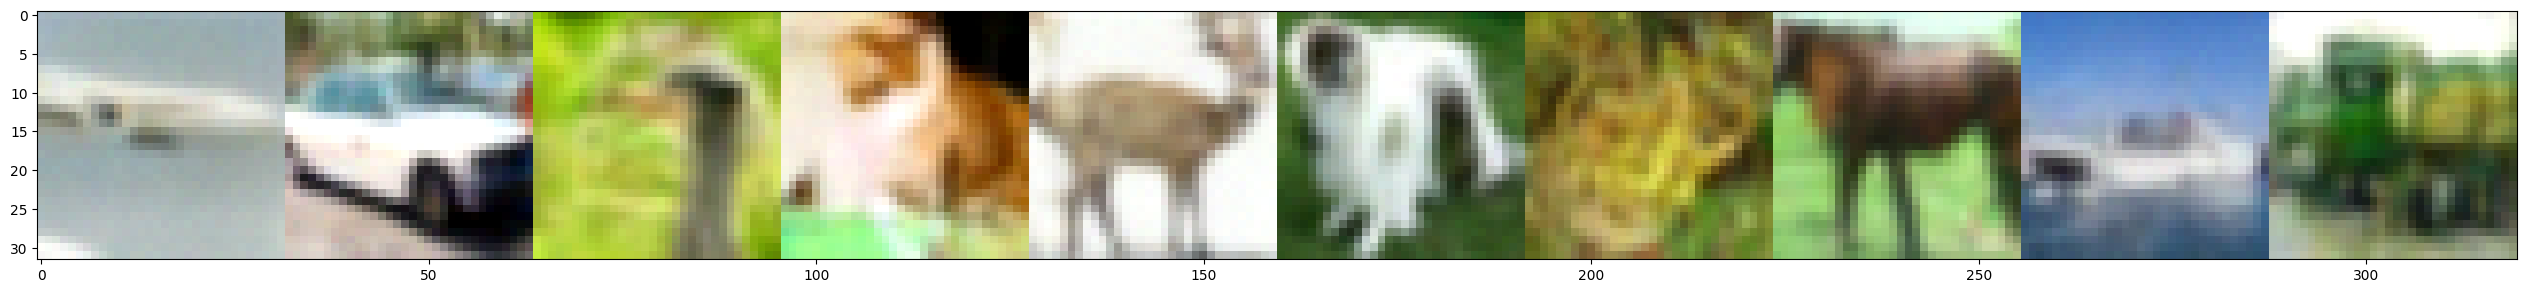

10:01:18 - INFO: Starting epoch 691:
100%|█████████████████████████████████████████████████████████████████████| 468/468 [03:49<00:00,  2.04it/s, MSE=0.0192]
10:05:08 - INFO: Starting epoch 692:
 69%|███████████████████████████████████████████████▍                     | 322/468 [02:37<01:11,  2.05it/s, MSE=0.0184]

In [ ]:
import ddpm_conditional
ddpm_conditional.continue_training()